# Plot the Test Accuracies for the different Baseline Models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os

## Load the log data

In [5]:
dn_train = np.load(os.path.abspath(os.path.join(os.getcwd(), '../Results/dn_train_dbpn.npy')))
dn_test = np.load(os.path.abspath(os.path.join(os.getcwd(), '../Results/dn_test_dbpn.npy')))

log_filename = 'resnext-0-log.txt'
log_dir= os.path.join(os.path.realpath(os.path.join(os.getcwd(), os.path.pardir)), 'log')
log_filepath = os.path.join(log_dir, log_filename)
print("Loading Logfile: {}".format(log_filepath))

with open(log_filepath) as f:
    lines = f.readlines()

epochs = []
test_loss = []
train_loss = []
test_acc = []

for line in lines:
    data = json.loads(line)
    epochs.append(data['epoch'])
    test_loss.append(data['test_loss'])
    train_loss.append(data['train_loss'])
    test_acc.append(data['test_accuracy'])

Loading Logfile: /datasets/home/46/646/bkambalu/project/log/resnext-0-log.txt


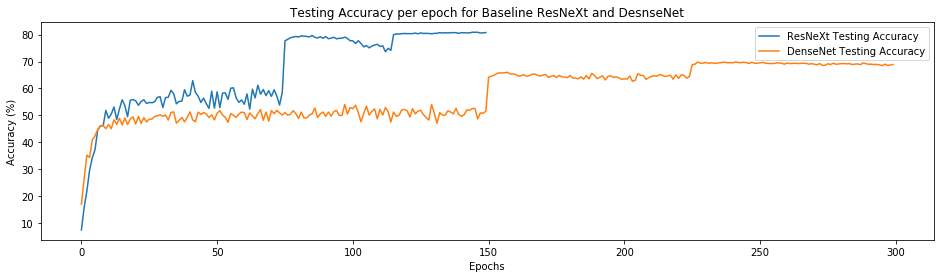

In [8]:
plt.figure(figsize = (16,4))
plt.subplot(1,1,1)
plt.title('Testing Accuracy per epoch for Baseline ResNeXt and DesnseNet')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
resnext_test_acc_h = plt.plot(epochs, np.array(test_acc)*100, label='ResNeXt Testing Accuracy')
densenet_test_acc_h = plt.plot(dn_test, label='DenseNet Testing Accuracy')
plt.legend(handles = [resnext_test_acc_h[0], densenet_test_acc_h[0]])
plt.show()